In [1]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [27]:
vr = pd.read_csv('/Users/stc/Downloads/VR_norm.csv', index_col=0)

In [38]:
vr.PIN.nunique()

3352

In [28]:
#Importing the FormWords
xls =  pd.read_excel('/Users/stc/Downloads/OR Forms for Norming 07.08.2020_WithWords.xlsx',sheet_name = "Formatted_Forms")

In [29]:
#routing forms are everything that contain “Routing_” in the column Form in FormWords. Remember that routing form item IDs overlap with Live Form item IDs so you can’t just do a match across all items taken.
form=xls[xls['Form'].str.contains("Form")]

In [35]:
reg =allage[['PIN', 'Age', 'Education']]

In [ ]:
df =pd.merge(vr, reg, on=['RegistrationID', 'PIN','DeviceID'])

In [39]:
reg.PIN.nunique()

2869

In [34]:
vr.head()

,PIN,RegistrationID,DeviceID,ResponseID,ItemID,AssessmentName,InstrumentTitle,TestName,InstrumentID,Key,Value
1,MAP10001,C2D64D16-D416-4676-A23E-C200CCC15F21,49CF3CA6-E25F-4420-8E33-7099FFA052DE,ECA55988-82DC-48C3-8E47-87DBBA4886F3,VRTitle,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,4007D5E7-6A5A-4016-8C8C-DDA82D67D746,InstrumentOrder,12
2,MAP10001,C2D64D16-D416-4676-A23E-C200CCC15F21,49CF3CA6-E25F-4420-8E33-7099FFA052DE,ECA55988-82DC-48C3-8E47-87DBBA4886F3,VRTitle,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,4007D5E7-6A5A-4016-8C8C-DDA82D67D746,InstrumentSection,1
3,MAP10001,C2D64D16-D416-4676-A23E-C200CCC15F21,49CF3CA6-E25F-4420-8E33-7099FFA052DE,ECA55988-82DC-48C3-8E47-87DBBA4886F3,VRTitle,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,4007D5E7-6A5A-4016-8C8C-DDA82D67D746,ItemOrder,1
4,MAP10001,C2D64D16-D416-4676-A23E-C200CCC15F21,49CF3CA6-E25F-4420-8E33-7099FFA052DE,ECA55988-82DC-48C3-8E47-87DBBA4886F3,VRTitle,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,4007D5E7-6A5A-4016-8C8C-DDA82D67D746,Locale,en-US
5,MAP10001,C2D64D16-D416-4676-A23E-C200CCC15F21,49CF3CA6-E25F-4420-8E33-7099FFA052DE,ECA55988-82DC-48C3-8E47-87DBBA4886F3,VRTitle,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,4007D5E7-6A5A-4016-8C8C-DDA82D67D746,Response,1


In [5]:
df4= pd.read_excel('/Users/stc/Downloads/OR_Norming_live_item.xlsx',sheet_name ='4')
del df4['Form']
del df4['Vocabulary']

In [6]:
df56= pd.read_excel('/Users/stc/Downloads/OR_Norming_live_item.xlsx',sheet_name ='5-6')

In [7]:
df79= pd.read_excel('/Users/stc/Downloads/OR_Norming_live_item.xlsx',sheet_name ='7-9')

In [8]:
df10= pd.read_excel('/Users/stc/Downloads/OR_Norming_live_item.xlsx',sheet_name ='10-SC')

In [9]:
df10.shape

(32116, 10)

In [10]:
df4= df4.append(df10[df10.Age==4])

In [11]:
df56= df56.append(df10[df10.Age==6])

In [12]:
df10 = df10[df10.Age>=10]

In [13]:
dfBP= pd.read_excel('/Users/stc/Downloads/OR_Norming_live_item.xlsx',sheet_name ='BachPlus')
del dfBP['Form']
del dfBP['Vocabulary']

In [14]:
def max_match(df, form):
    dfr = pd.merge(df, form, on=['ItemID'])
    #get the max match Form for each PIN
    dfr =dfr.drop_duplicates()
    rv = dfr.groupby(['PIN','Form'])['Age'].count().sort_values().groupby(level=0).tail(1)
    rv = rv.to_frame()
    rv.columns = ['Match']
    
    result = pd.merge(dfr, rv, on=['PIN','Form'])
    keep = ['PIN', 'Form','ItemID', 'Vocabulary', 'Age', 'Education', 'Score']
    result = result[keep].drop_duplicates()
    
    match =result.PIN.value_counts().to_frame()
    match = match.reset_index()
    match.columns=['PIN','Match']
    
    final = pd.merge(result, match,on='PIN')
    return final

In [15]:
m4 = max_match(df4, form)
m56 = max_match(df56, form)
m79 = max_match(df79, form)
m10 = max_match(df10, form)
mBP = max_match(dfBP, form)

In [201]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('/Users/stc/Downloads/max_match.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
m4.drop_duplicates().to_excel(writer, sheet_name='4')
m56.drop_duplicates().to_excel(writer, sheet_name='5-6')
m79.drop_duplicates().to_excel(writer, sheet_name='7-9')
m10.drop_duplicates().to_excel(writer, sheet_name='10')  
mBP.drop_duplicates().to_excel(writer, sheet_name='BachPlus')  

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

def draw(df, tt, var='Form'):
    
    pdf = df[df.Match<=15]
    x1 =pdf.groupby(var)['Age'].mean()
    x2 =pdf.groupby(var)['PIN'].count()
    y1= pdf.groupby(var)['Score'].mean()
    
    plt.title(tt+ var) #title
    plt.plot(x1, y1, '.', color='black');
    plt.xlabel('Mean Age') #x label
    plt.ylabel('Mean Score') #y label
    # zip joins x and y coordinates in pairs
    for i in range(len(x1)):
        label = y1.index[i]
        plt.annotate(label, # this is the text
                 (x1[i],y1[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    plt.show()

    
    plt.plot(x2, y1, 'o', color='black');
    plt.title(tt+ var) #title
    plt.xlabel('Number of Participants') #x label
    plt.ylabel('Mean Score') #y label
    # zip joins x and y coordinates in pairs
    for i in range(len(x2)):
        label = y1.index[i]
        plt.annotate(label, # this is the text
                 (x2[i],y1[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [23]:
mlist = [m4,m56,m79,m10,mBP]

In [18]:
allage = pd.concat(mlist)

In [19]:
allage

,PIN,Form,ItemID,Vocabulary,Age,Education,Score,Match
0,NBS04006,Form 2,LARE001,Z,4.0,2.0,0,13
1,NBS04006,Form 2,LARE002,X,4.0,2.0,0,13
2,NBS04006,Form 2,LARE003,P,4.0,2.0,0,13
3,NBS04006,Form 2,LARE004,M,4.0,2.0,0,13
4,NBS04006,Form 2,LARE007,S,4.0,2.0,0,13
...,...,...,...,...,...,...,...,...
6207,SDA30109,Form 26,LARE189,enunciate,35.0,20.0,1,15
6208,SDA30109,Form 26,LARE226,insinuation,35.0,20.0,0,15
6209,SDA30109,Form 26,LARE235,excruciating,35.0,20.0,1,15
6210,SDA30109,Form 26,LARE247,preponderance,35.0,20.0,1,15


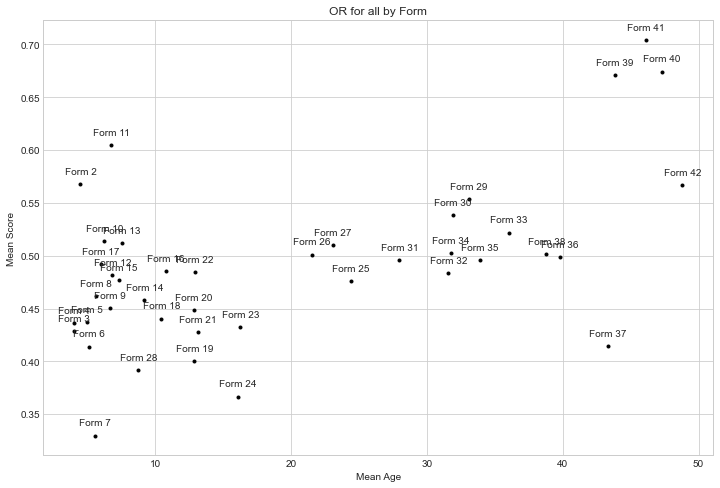

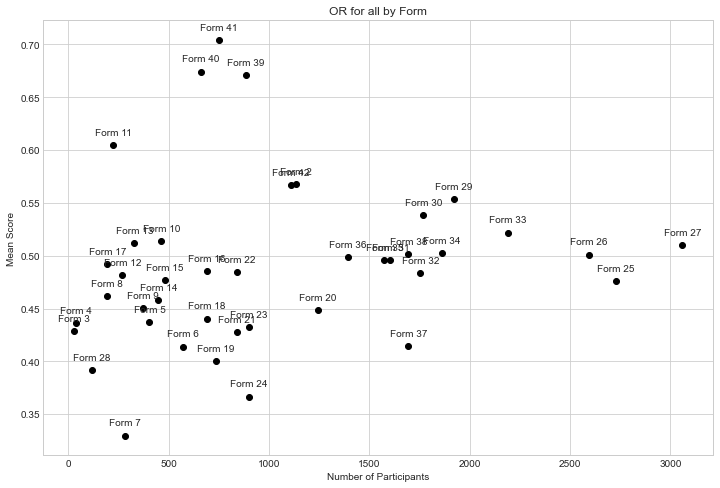

In [24]:
draw(allage,'OR for all by ','Form')

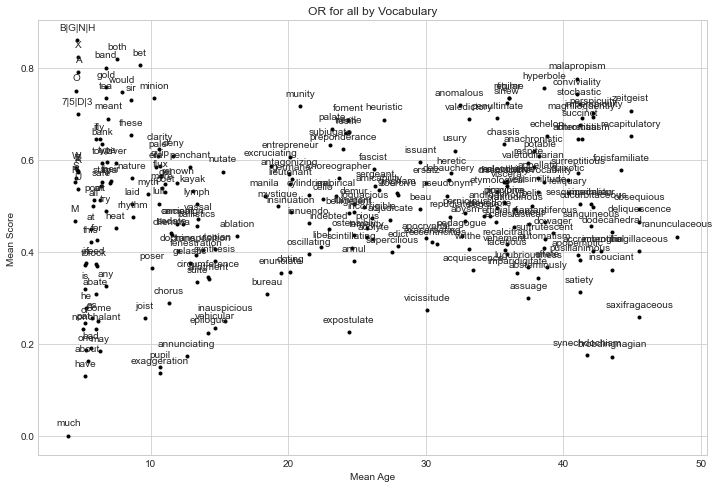

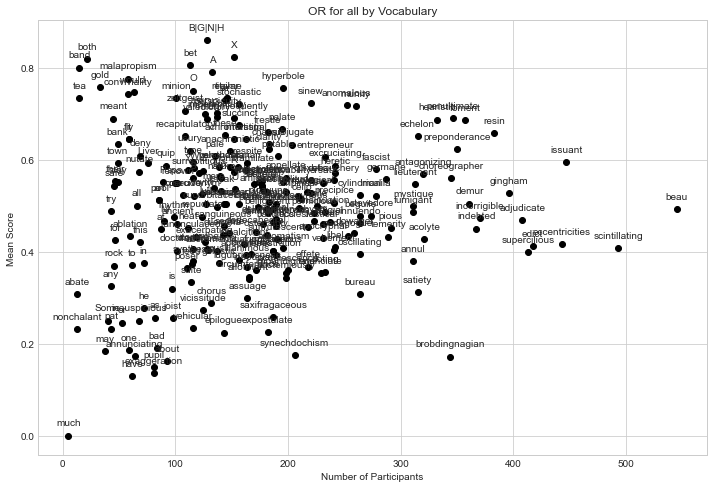

In [25]:
draw(allage,'OR for all by ','Vocabulary')

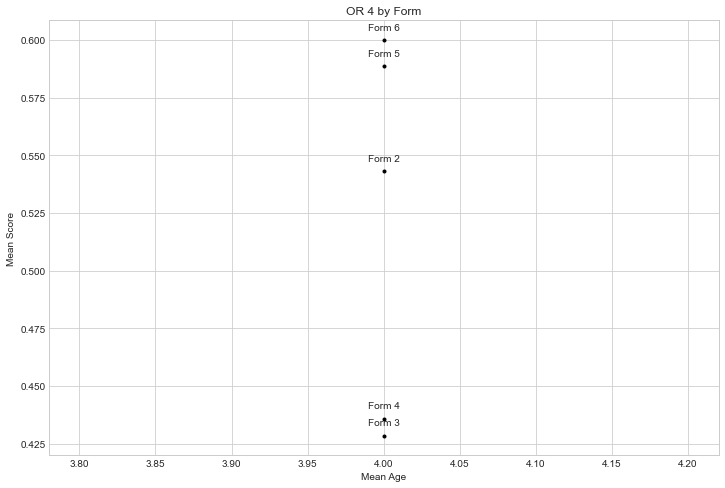

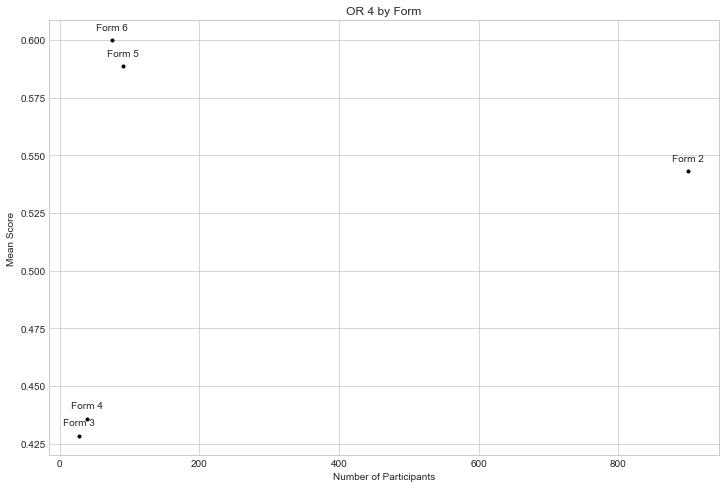

In [306]:
draw(m4,'OR 4 by ','Form')

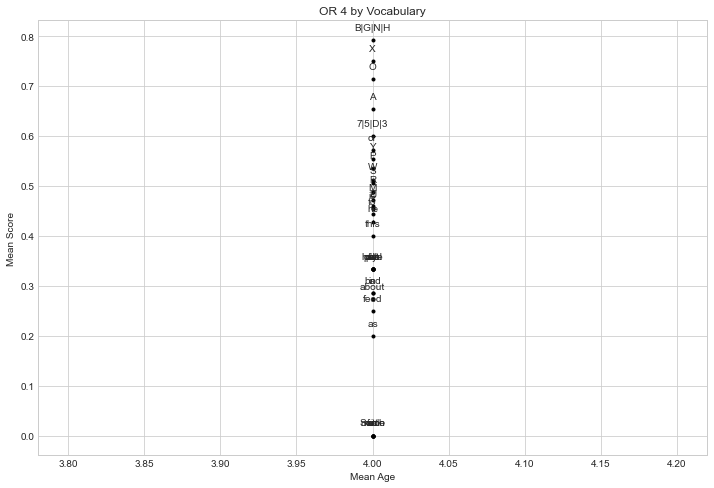

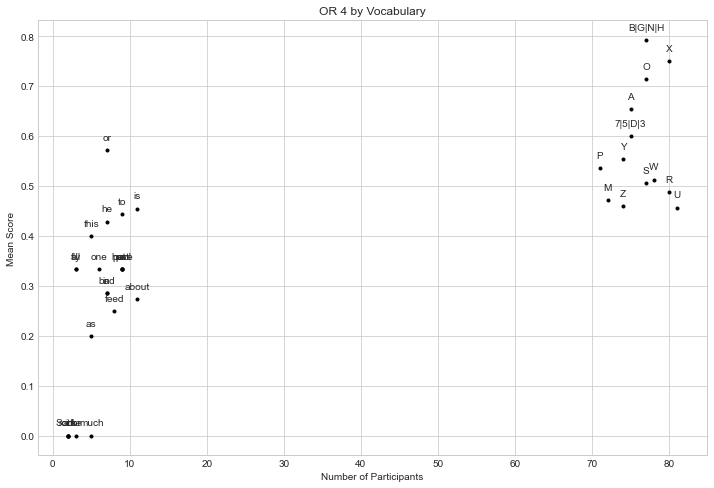

In [300]:
draw(m4,'OR 4 by ','Vocabulary')

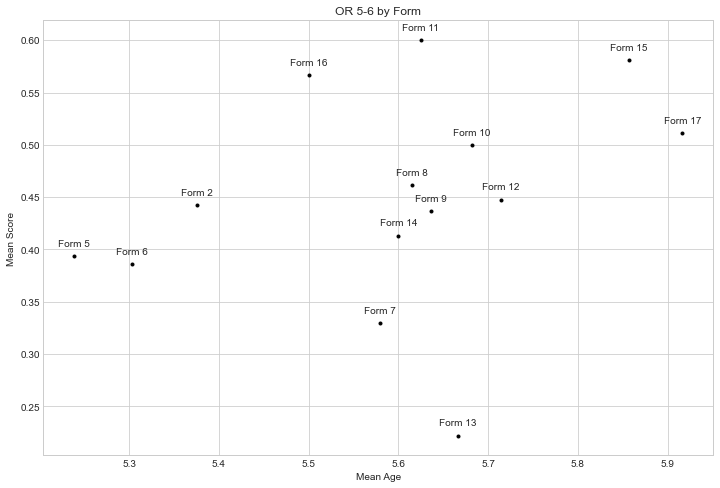

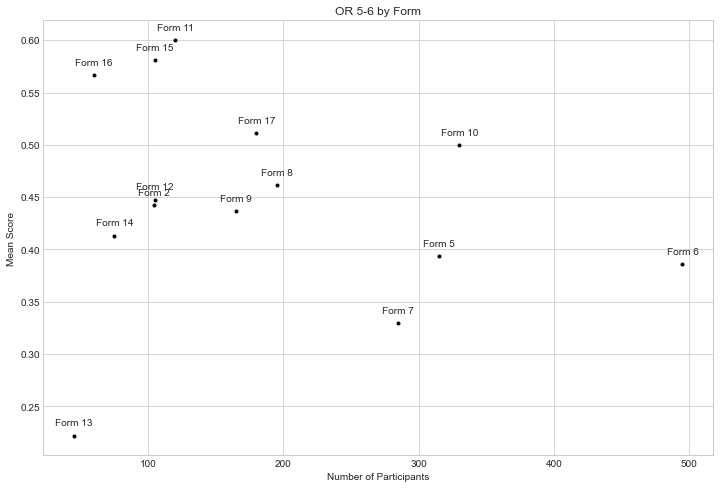

In [301]:
draw(m56,'OR 5-6 by ','Form')

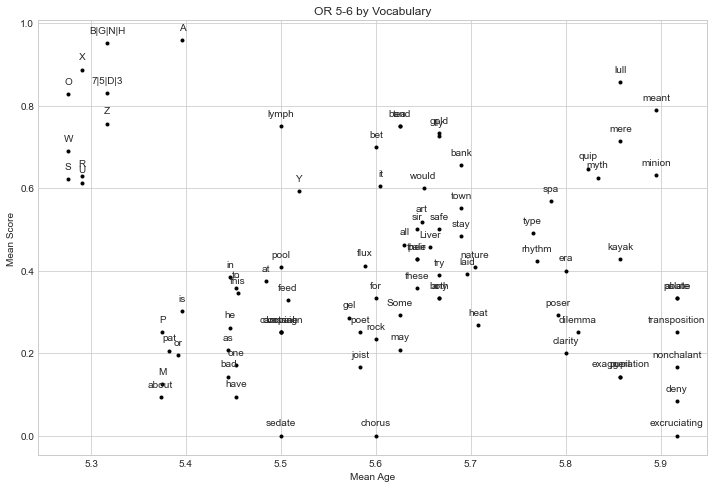

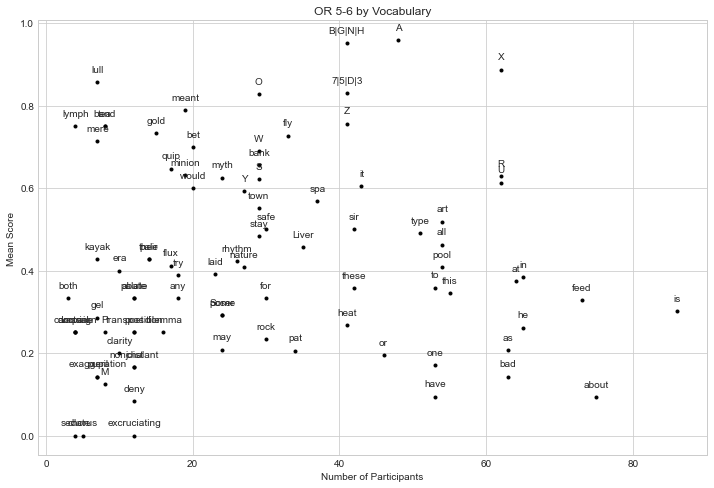

In [302]:
draw(m56,'OR 5-6 by ','Vocabulary')

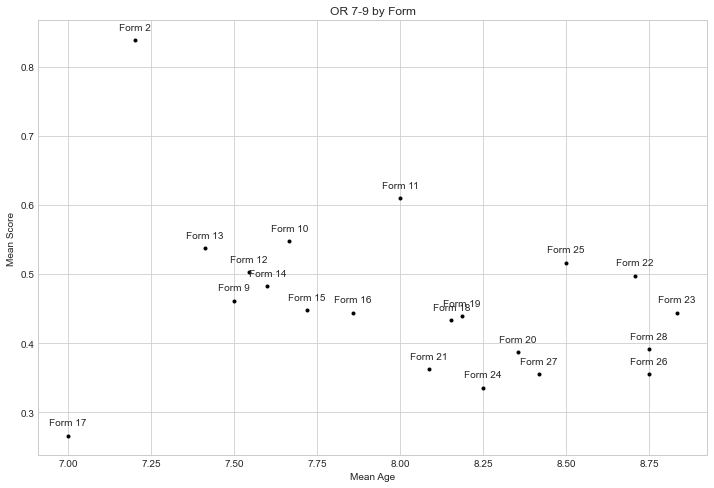

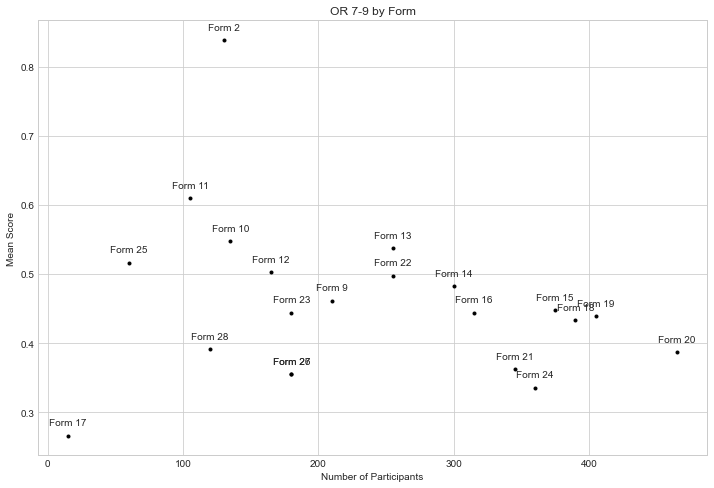

In [307]:
draw(m79,'OR 7-9 by ','Form')

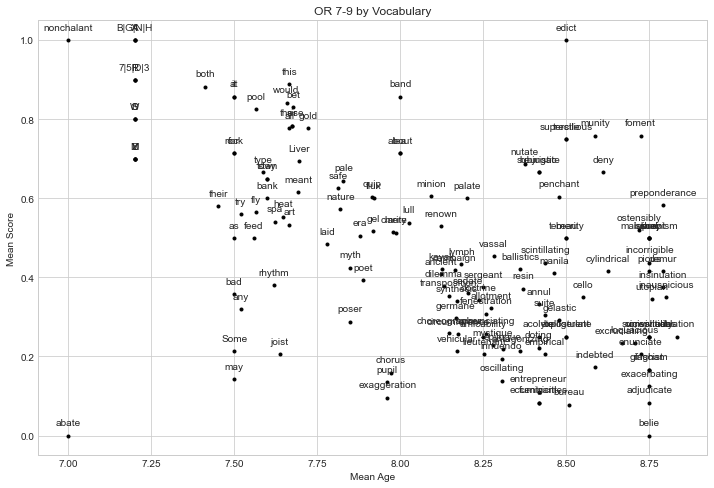

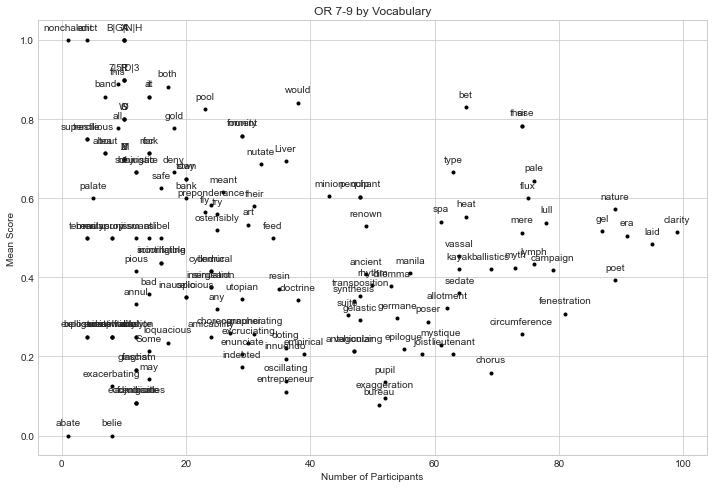

In [308]:
draw(m79,'OR 7-9 by ','Vocabulary')

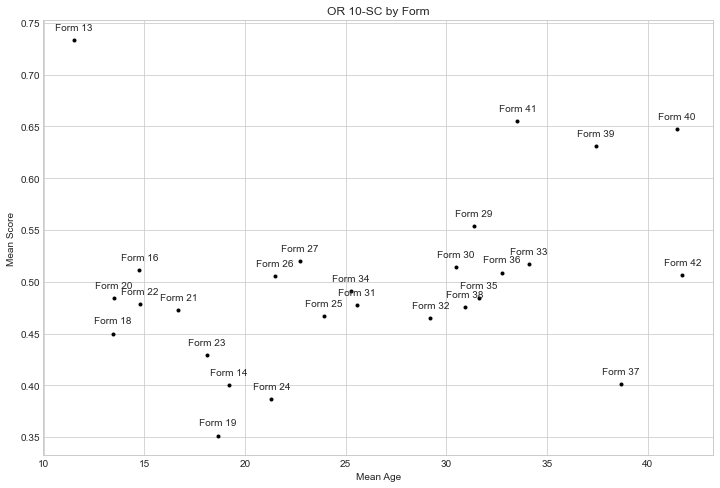

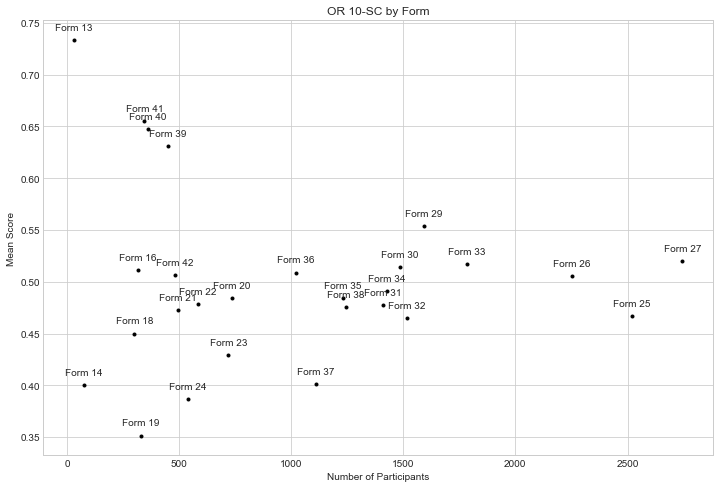

In [310]:
draw(m10,'OR 10-SC by ','Form')

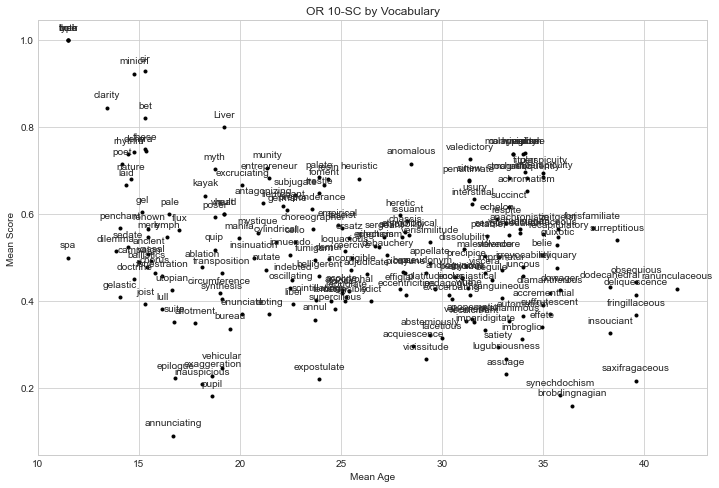

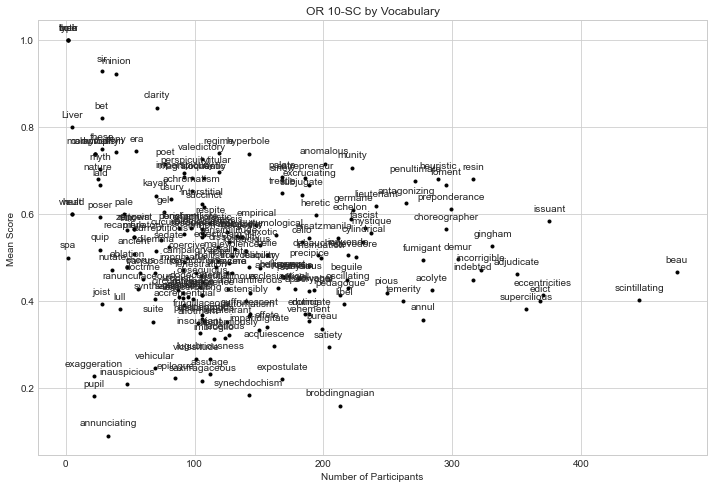

In [311]:
draw(m10,'OR 10-SC by ','Vocabulary')

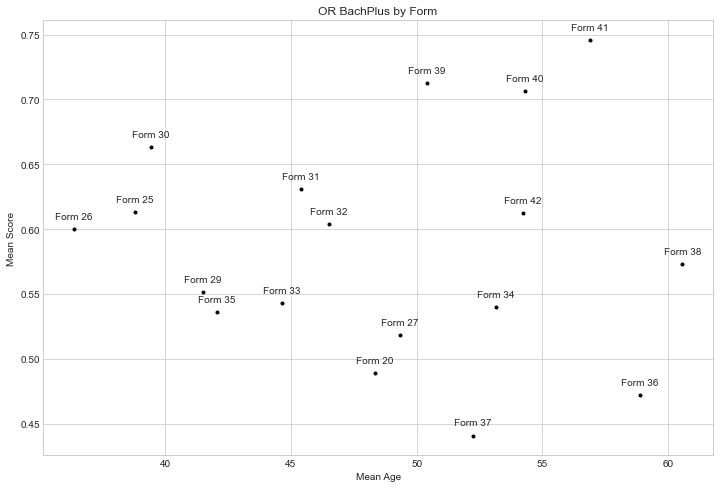

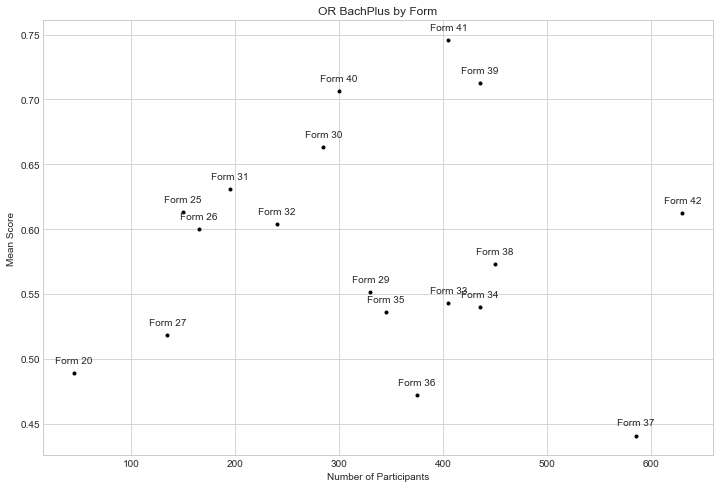

In [313]:
draw(mBP,'OR BachPlus by ','Form')

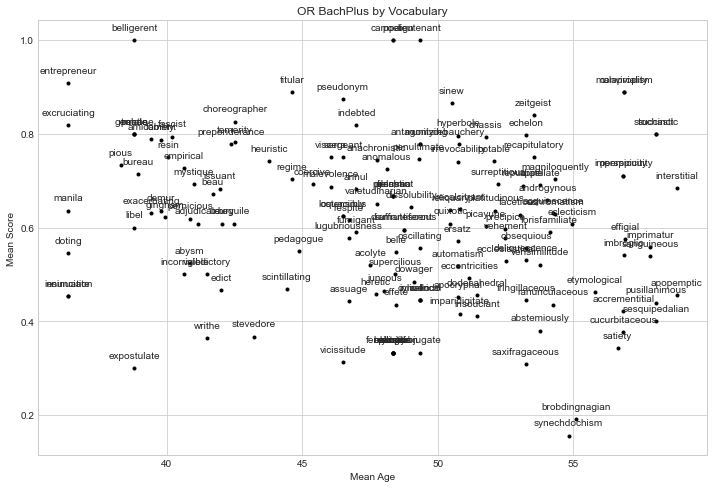

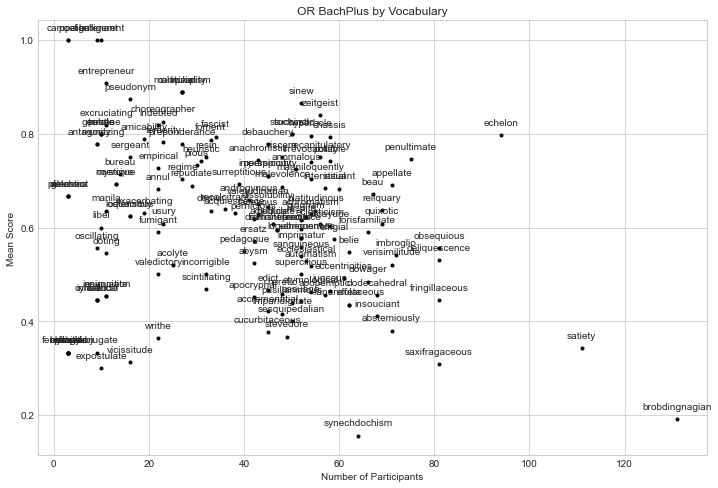

In [314]:
draw(mBP,'OR BachPlus by ','Vocabulary')

## Filter by different age

In [245]:
four = reg[reg.Age<=4]

In [246]:
df4 =pd.merge(rv, four, on=['RegistrationID', 'PIN','DeviceID'])

In [247]:
df4.drop_duplicates()
df4.shape

(1075, 19)

In [248]:
df4 =df4[(df4.Position >=3) & (df4.Position <=7)]

In [250]:
df4

,RegistrationID,PIN,ItemID,DeviceID,Position,Response,Score,Form,Vocabulary,Age,Education,MothersEducation,FathersEducation,GuardiansEducation,ExaminerName,Gender,Handedness,Race,Ethnicity
1,9754308E-64C0-42A6-AA35-2DD5AA424212,MSL11011,LARE092,DA90E71A-E0DF-43AA-8D44-E13ACC67B72A,3.0,1.0,1.0,Routing_10-SC,abate,3.0,8.0,21.0,NaN,NaN,Donneice M,2.0,1.0,1,1.0
4,9754308E-64C0-42A6-AA35-2DD5AA424212,MSL11011,LARE143,DA90E71A-E0DF-43AA-8D44-E13ACC67B72A,7.0,1.0,1.0,Routing_7-9,amplify,3.0,8.0,21.0,NaN,NaN,Donneice M,2.0,1.0,1,1.0
5,9754308E-64C0-42A6-AA35-2DD5AA424212,MSL11011,LARE143,DA90E71A-E0DF-43AA-8D44-E13ACC67B72A,7.0,1.0,1.0,Routing_10-SC,amplify,3.0,8.0,21.0,NaN,NaN,Donneice M,2.0,1.0,1,1.0
8,9754308E-64C0-42A6-AA35-2DD5AA424212,MSL11011,LARE172,DA90E71A-E0DF-43AA-8D44-E13ACC67B72A,6.0,1.0,1.0,Routing_7-9,conscious,3.0,8.0,21.0,NaN,NaN,Donneice M,2.0,1.0,1,1.0
9,9754308E-64C0-42A6-AA35-2DD5AA424212,MSL11011,LARE172,DA90E71A-E0DF-43AA-8D44-E13ACC67B72A,6.0,1.0,1.0,Routing_10-SC,conscious,3.0,8.0,21.0,NaN,NaN,Donneice M,2.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,FE419795-2022-4FE0-AA40-A26B7DE198A7,MAP04005,LARE028,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,4.0,2.0,0.0,Routing_7-9,did,4.0,2.0,16.0,NaN,NaN,Clare S,2.0,1.0,0,NaN
1069,FE419795-2022-4FE0-AA40-A26B7DE198A7,MAP04005,LARE008,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,5.0,2.0,0.0,Routing_4,N,4.0,2.0,16.0,NaN,NaN,Clare S,2.0,1.0,0,NaN
1070,FE419795-2022-4FE0-AA40-A26B7DE198A7,MAP04005,LARE008,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,5.0,2.0,0.0,Routing_5-6,N,4.0,2.0,16.0,NaN,NaN,Clare S,2.0,1.0,0,NaN
1071,FE419795-2022-4FE0-AA40-A26B7DE198A7,MAP04005,LARE021,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,3.0,2.0,0.0,Routing_4,on,4.0,2.0,16.0,NaN,NaN,Clare S,2.0,1.0,0,NaN


In [260]:
df =pd.merge(rv, reg, on=['RegistrationID', 'PIN','DeviceID'])

In [191]:
df.RegistrationID.nunique()

3412

In [192]:
reg.RegistrationID.nunique()

3260

In [261]:
dd =df.groupby(['Form','ItemID','Vocabulary'])['Score'].mean().reset_index()
dd

,Form,ItemID,Vocabulary,Score
0,Routing_10-SC,LARE080,meant,0.961071
1,Routing_10-SC,LARE092,abate,0.870267
2,Routing_10-SC,LARE135,viscous,0.261269
3,Routing_10-SC,LARE143,amplify,0.837920
4,Routing_10-SC,LARE144,bucolic,0.483723
5,Routing_10-SC,LARE172,conscious,0.770290
6,Routing_10-SC,LARE175,aesthetic,0.768562
7,Routing_10-SC,LARE198,nonchalant,0.785892
8,Routing_10-SC,LARE251,recrudescence,0.305219
9,Routing_10-SC,LARE264,reconnaissance,0.525459


In [262]:
ct=df.groupby(['Form','ItemID','Vocabulary'])['Position'].count().reset_index()
ct

,Form,ItemID,Vocabulary,Position
0,Routing_10-SC,LARE080,meant,1644
1,Routing_10-SC,LARE092,abate,1611
2,Routing_10-SC,LARE135,viscous,2396
3,Routing_10-SC,LARE143,amplify,1962
4,Routing_10-SC,LARE144,bucolic,2396
5,Routing_10-SC,LARE172,conscious,2760
6,Routing_10-SC,LARE175,aesthetic,2761
7,Routing_10-SC,LARE198,nonchalant,2410
8,Routing_10-SC,LARE251,recrudescence,2395
9,Routing_10-SC,LARE264,reconnaissance,2396


In [253]:
st=df4.groupby(['Form','ItemID','Vocabulary'])['Age'].std().reset_index()
st

,Form,ItemID,Vocabulary,Age
0,Routing_10-SC,LARE092,abate,NaN
1,Routing_10-SC,LARE143,amplify,NaN
2,Routing_10-SC,LARE172,conscious,NaN
3,Routing_10-SC,LARE175,aesthetic,NaN
4,Routing_10-SC,LARE251,recrudescence,NaN
5,Routing_4,LARE005,C,0.000000
6,Routing_4,LARE008,N,0.131306
7,Routing_4,LARE021,on,0.128037
8,Routing_4,LARE028,did,0.132453
9,Routing_4,LARE034,box,0.000000


In [263]:
age =df.groupby(['Form','ItemID','Vocabulary'])['Age'].mean().reset_index()
age

,Form,ItemID,Vocabulary,Age
0,Routing_10-SC,LARE080,meant,22.833130
1,Routing_10-SC,LARE092,abate,23.150404
2,Routing_10-SC,LARE135,viscous,31.422482
3,Routing_10-SC,LARE143,amplify,20.472690
4,Routing_10-SC,LARE144,bucolic,31.422482
5,Routing_10-SC,LARE172,conscious,28.347968
6,Routing_10-SC,LARE175,aesthetic,28.341676
7,Routing_10-SC,LARE198,nonchalant,31.274200
8,Routing_10-SC,LARE251,recrudescence,31.431020
9,Routing_10-SC,LARE264,reconnaissance,31.422482


In [255]:
result =pd.merge(dd, ct, on=['Form','ItemID','Vocabulary'])
result =pd.merge(result, age, on=['Form','ItemID','Vocabulary'])
result =pd.merge(result, st, on=['Form','ItemID','Vocabulary'])

In [256]:
result.columns=['Form', 'ItemID', 'Vocabulary', 'Proportion_Correct', 'N','MeanAge','SDAge']

In [257]:
result

,Form,ItemID,Vocabulary,Proportion_Correct,N,MeanAge,SDAge
0,Routing_10-SC,LARE092,abate,1.000000,1,3.000000,NaN
1,Routing_10-SC,LARE143,amplify,1.000000,1,3.000000,NaN
2,Routing_10-SC,LARE172,conscious,1.000000,1,3.000000,NaN
3,Routing_10-SC,LARE175,aesthetic,1.000000,1,3.000000,NaN
4,Routing_10-SC,LARE251,recrudescence,1.000000,1,3.000000,NaN
5,Routing_4,LARE005,C,0.568627,51,4.000000,0.000000
6,Routing_4,LARE008,N,0.517241,58,3.982759,0.131306
7,Routing_4,LARE021,on,0.196721,61,3.983607,0.128037
8,Routing_4,LARE028,did,0.087719,57,3.982456,0.132453
9,Routing_4,LARE034,box,0.098039,51,4.000000,0.000000


In [259]:
result.to_csv('C:/Users/tsb7592/Downloads/OR_routingform_below4.csv', index=False)